In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings(action='ignore')

## 출루율 예측용 데이터셋

#### 1) 전체 연도 평균값

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/빅콘테스트/df_with_barrel.csv', index_col=0)
df

,PCODE,GYEAR_x,INN,타구속도,발사각도,투구구속,score,배럴타구,배럴타구 생성률,GYEAR_y,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,OPS,인플레이타구비율,배럴생성률
0,50054,2020.236364,5.709091,129.736545,17.340000,133.922182,0.327273,0.000000,0,2020.5,45.500000,52.500000,47.0,0.2015,9.500000,0.000000,11.000000,0.223000,0.000000,4.000000,10.000000,0.00,1.500000,0.0,0.285714,0.508714,0.256757,0
1,50066,2020.000000,6.705882,135.414706,15.523529,136.991176,0.647059,0.000000,0,2020.0,26.000000,32.000000,30.0,0.2000,6.000000,1.000000,11.000000,0.367000,0.000000,2.000000,11.000000,0.00,0.000000,1.0,0.250000,0.617000,0.277778,0
2,50150,2020.266667,5.266667,121.810000,22.000000,134.994333,0.433333,0.000000,0,2020.5,15.000000,21.500000,20.0,0.2335,6.000000,0.000000,7.000000,0.266500,0.000000,1.000000,4.000000,0.00,0.500000,1.0,0.348837,0.615337,0.375000,0
3,50165,2020.326781,4.867322,143.027052,24.040295,136.578231,0.793612,0.149877,0,2020.5,84.000000,349.500000,308.0,0.2605,82.500000,23.000000,166.500000,0.507000,2.000000,36.500000,89.500000,2.50,3.000000,4.5,0.353693,0.860693,0.307494,0
4,50167,2021.000000,6.000000,134.493333,38.333333,135.801667,0.166667,0.000000,0,2021.0,14.000000,19.000000,16.0,0.1250,2.000000,0.000000,2.000000,0.125000,0.000000,1.000000,7.000000,0.00,1.000000,0.0,0.222222,0.347222,0.222222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,79530,2018.741935,5.548387,125.261290,18.138710,134.191613,0.451613,0.000000,0,2018.5,19.500000,32.000000,29.0,0.2110,5.000000,0.000000,7.000000,0.305500,0.500000,1.500000,10.000000,0.00,0.000000,2.0,0.209677,0.515177,0.270270,0
433,79608,2019.192437,4.815966,134.883613,17.868992,135.582790,0.563025,0.027731,0,2019.5,103.500000,415.750000,370.0,0.3170,117.500000,10.250000,174.750000,0.467250,5.250000,34.250000,43.250000,1.25,4.500000,9.5,0.379290,0.846540,0.344578,0
434,79705,2018.674419,5.511628,129.453798,22.980620,135.455969,0.573643,0.023256,0,2019.0,43.666667,81.333333,69.0,0.2190,16.333333,2.333333,26.666667,0.345667,0.666667,8.333333,18.666667,0.00,1.333333,2.0,0.327731,0.673398,0.295775,0
435,99606,2018.000000,5.521008,134.364286,13.147059,134.503866,0.621849,0.050420,0,2018.0,88.000000,205.000000,183.0,0.2950,54.000000,4.000000,77.000000,0.421000,1.000000,16.000000,49.000000,1.00,5.000000,5.0,0.368932,0.789932,0.387597,0


In [ ]:
df = df[['PCODE', '타석', '타율', '홈런', '볼넷', '삼진', '출루율']]
df

,PCODE,타석,타율,홈런,볼넷,삼진,출루율
0,50054,52.500000,0.2015,0.000000,4.000000,10.000000,0.285714
1,50066,32.000000,0.2000,1.000000,2.000000,11.000000,0.250000
2,50150,21.500000,0.2335,0.000000,1.000000,4.000000,0.348837
3,50165,349.500000,0.2605,23.000000,36.500000,89.500000,0.353693
4,50167,19.000000,0.1250,0.000000,1.000000,7.000000,0.222222
...,...,...,...,...,...,...,...
432,79530,32.000000,0.2110,0.000000,1.500000,10.000000,0.209677
433,79608,415.750000,0.3170,10.250000,34.250000,43.250000,0.379290
434,79705,81.333333,0.2190,2.333333,8.333333,18.666667,0.327731
435,99606,205.000000,0.2950,4.000000,16.000000,49.000000,0.368932


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/빅콘테스트/01_제공데이터/출루율18.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/빅콘테스트/01_제공데이터/출루율19.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/빅콘테스트/01_제공데이터/출루율20.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/빅콘테스트/01_제공데이터/출루율21.xlsx')
df18 = df1.dropna()
df19 = df2.dropna()
df20 = df3.dropna()
df21 = df4.dropna()
df18 = df18[['이름','P/PA','전체','초구','컨택%','2S후커트%','2S후선구%']]
df19 = df19[['이름','P/PA','전체','초구','컨택%','2S후커트%','2S후선구%']]
df20 = df20[['이름','P/PA','전체','초구','컨택%','2S후커트%','2S후선구%']]
df21 = df21[['이름','P/PA','전체','초구','컨택%','2S후커트%','2S후선구%']]

In [ ]:
df18

,이름,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%
1,이병규,4.36,36.7,21.8,73.7,67.2,47.4
2,강경학,4.26,42.6,26.3,81.9,76.8,36.8
3,한유섬,4.21,42.9,21.2,74.5,72.6,36.5
4,박경수,4.20,42.6,28.4,74.1,67.7,40.7
5,정은원,4.19,41.2,19.8,76.8,72.1,38.5
...,...,...,...,...,...,...,...
97,김재현,3.54,43.2,33.8,73.7,57.8,36.9
98,박건우,3.49,47.6,33.7,83.6,79.3,31.4
99,김성현,3.48,45.9,32.9,88.5,84.8,35.6
100,안치홍,3.43,47.4,27.7,82.7,80.4,30.1


In [ ]:
df_all = pd.concat([df18, df19, df20, df21])
df_all

,이름,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%
1,이병규,4.36,36.7,21.8,73.7,67.2,47.4
2,강경학,4.26,42.6,26.3,81.9,76.8,36.8
3,한유섬,4.21,42.9,21.2,74.5,72.6,36.5
4,박경수,4.20,42.6,28.4,74.1,67.7,40.7
5,정은원,4.19,41.2,19.8,76.8,72.1,38.5
...,...,...,...,...,...,...,...
99,류지혁,3.56,44.3,35.6,83.1,78.6,40.1
100,강민호,3.54,43.8,22.4,81.7,79.1,38.5
101,황대인,3.50,51.5,35.2,75.6,64.7,29.3
102,페르난데스,3.47,45.5,29.5,89.3,87.6,36.7


In [ ]:
df_all = df_all.groupby(df_all['이름']).mean()
df_all = df_all.reset_index()
df_all

,이름,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%
0,강경학,4.2350,38.900,23.250,77.800,69.450,37.000
1,강로한,3.8300,50.100,36.900,64.100,55.800,30.500
2,강민호,3.7400,45.275,26.775,77.725,74.750,36.825
3,강백호,4.0000,44.225,31.225,78.775,74.625,37.525
4,강승호,3.8300,52.600,31.400,74.300,72.400,29.300
...,...,...,...,...,...,...,...
163,호잉,3.7100,47.700,30.150,78.350,74.400,35.000
164,홍창기,4.2800,36.800,18.950,84.050,79.200,42.350
165,황대인,3.5000,51.500,35.200,75.600,64.700,29.300
166,황재균,3.9325,44.175,25.000,80.700,76.050,34.225


In [ ]:
p18 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018.csv',encoding = 'cp949')
p19 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019.csv',encoding = 'cp949')
p20 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020.csv',encoding = 'cp949')
p21 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021.csv',encoding = 'cp949')

In [ ]:
pf = pd.concat([p18,p19,p20,p21])
pf = pf[['PCODE','NAME']]
pf = pf.drop_duplicates()
pf

,PCODE,NAME
0,60100,백창수
1,60105,배민관
2,60140,신정락
3,60146,이승현
4,60181,김지용
...,...,...
483,68619,윤중현
500,69102,문보경
504,69113,임준형
514,69366,이명기


In [ ]:
len(pf.NAME.unique())

1037

In [ ]:
df_all = df_all.rename(columns={'이름' : 'NAME'})
df_all

,NAME,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%
0,강경학,4.2350,38.900,23.250,77.800,69.450,37.000
1,강로한,3.8300,50.100,36.900,64.100,55.800,30.500
2,강민호,3.7400,45.275,26.775,77.725,74.750,36.825
3,강백호,4.0000,44.225,31.225,78.775,74.625,37.525
4,강승호,3.8300,52.600,31.400,74.300,72.400,29.300
...,...,...,...,...,...,...,...
163,호잉,3.7100,47.700,30.150,78.350,74.400,35.000
164,홍창기,4.2800,36.800,18.950,84.050,79.200,42.350
165,황대인,3.5000,51.500,35.200,75.600,64.700,29.300
166,황재균,3.9325,44.175,25.000,80.700,76.050,34.225


In [ ]:
df

,PCODE,타석,타율,홈런,볼넷,삼진,출루율
0,50054,52.500000,0.2015,0.000000,4.000000,10.000000,0.285714
1,50066,32.000000,0.2000,1.000000,2.000000,11.000000,0.250000
2,50150,21.500000,0.2335,0.000000,1.000000,4.000000,0.348837
3,50165,349.500000,0.2605,23.000000,36.500000,89.500000,0.353693
4,50167,19.000000,0.1250,0.000000,1.000000,7.000000,0.222222
...,...,...,...,...,...,...,...
432,79530,32.000000,0.2110,0.000000,1.500000,10.000000,0.209677
433,79608,415.750000,0.3170,10.250000,34.250000,43.250000,0.379290
434,79705,81.333333,0.2190,2.333333,8.333333,18.666667,0.327731
435,99606,205.000000,0.2950,4.000000,16.000000,49.000000,0.368932


In [ ]:
#2021시즌 팀별 평균적으로 75경기 수행
QAB = (144*3.1 * 3/4) + (75 * 3.1 * 1/4)
QAB = QAB * 0.5
remove_index = df['타석'] < QAB
df =df[~remove_index]
df

,PCODE,타석,타율,홈런,볼넷,삼진,출루율
3,50165,349.50,0.26050,23.00,36.50,89.50,0.353693
11,50350,271.00,0.25400,2.00,22.00,37.00,0.319853
14,50458,241.50,0.24950,1.00,18.50,32.50,0.306383
16,50469,217.00,0.20900,8.00,18.00,58.00,0.271889
17,50506,417.00,0.27850,8.00,45.50,47.00,0.363745
...,...,...,...,...,...,...,...
428,79402,447.75,0.26225,5.25,40.50,59.75,0.348785
430,79456,239.50,0.30200,0.75,14.00,23.50,0.352008
433,79608,415.75,0.31700,10.25,34.25,43.25,0.379290
435,99606,205.00,0.29500,4.00,16.00,49.00,0.368932


In [ ]:
pf = pf.reset_index()

In [ ]:
pf[pf['NAME']=='한유섬']

,index,PCODE,NAME
1071,205,62895,한유섬


In [ ]:
pf['NAME'][1071] = '한동민'

In [ ]:
pf[pf['NAME']=='나종덕']

,index,PCODE,NAME
343,343,67539,나종덕


In [ ]:
pf['NAME'][343] = '나균안'

In [ ]:
pf[pf['PCODE']==67539]

,index,PCODE,NAME
343,343,67539,나종덕
969,416,67539,나균안


In [ ]:
pf[pf['PCODE']==62895]

,index,PCODE,NAME
113,113,62895,한동민
1071,205,62895,한동민


In [ ]:
pf = pf.drop('index', axis =1)
pf

,PCODE,NAME
0,60100,백창수
1,60105,배민관
2,60140,신정락
3,60146,이승현
4,60181,김지용
...,...,...
1076,68619,윤중현
1077,69102,문보경
1078,69113,임준형
1079,69366,이명기


In [ ]:
pf = pf.drop_duplicates()
pf

,PCODE,NAME
0,60100,백창수
1,60105,배민관
2,60140,신정락
3,60146,이승현
4,60181,김지용
...,...,...
1076,68619,윤중현
1077,69102,문보경
1078,69113,임준형
1079,69366,이명기


In [ ]:
df=  pd.merge(pf, df, how = 'inner', on='PCODE')
df

,PCODE,NAME,타석,타율,홈런,볼넷,삼진,출루율
0,60523,정훈,302.00,0.28975,7.25,32.25,54.00,0.376451
1,60558,오태곤,287.75,0.25750,6.75,19.00,62.25,0.315513
2,61102,유강남,414.50,0.27000,14.00,26.50,70.50,0.337560
3,61186,이천웅,393.00,0.28000,2.25,38.50,49.00,0.369093
4,61208,정진호,225.50,0.25350,1.25,18.50,35.00,0.333713
...,...,...,...,...,...,...,...,...
128,50923,알테어,418.50,0.27900,24.50,35.00,115.00,0.355529
129,51004,알몬테,250.00,0.27100,7.00,22.00,50.00,0.336000
130,51463,피렐라,361.00,0.31200,20.00,30.00,45.00,0.378453
131,51725,힐리,268.00,0.25700,7.00,16.00,58.00,0.305970


In [ ]:
df_test2[df_test2['PCODE'] == 62895]

,index,PCODE,NAME,타석,타율,홈런,볼넷,삼진,출루율
14,113,62895,한동민,394.75,0.26475,20.25,42.25,83.25,0.372166
15,205,62895,한동민,394.75,0.26475,20.25,42.25,83.25,0.372166


In [ ]:
df

,PCODE,NAME,타석,타율,홈런,볼넷,삼진,출루율
0,60523,정훈,302.00,0.28975,7.25,32.25,54.00,0.376451
1,60558,오태곤,287.75,0.25750,6.75,19.00,62.25,0.315513
2,61102,유강남,414.50,0.27000,14.00,26.50,70.50,0.337560
3,61186,이천웅,393.00,0.28000,2.25,38.50,49.00,0.369093
4,61208,정진호,225.50,0.25350,1.25,18.50,35.00,0.333713
...,...,...,...,...,...,...,...,...
128,50923,알테어,418.50,0.27900,24.50,35.00,115.00,0.355529
129,51004,알몬테,250.00,0.27100,7.00,22.00,50.00,0.336000
130,51463,피렐라,361.00,0.31200,20.00,30.00,45.00,0.378453
131,51725,힐리,268.00,0.25700,7.00,16.00,58.00,0.305970


In [ ]:
df_all

,NAME,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%
0,강경학,4.2350,38.900,23.250,77.800,69.450,37.000
1,강로한,3.8300,50.100,36.900,64.100,55.800,30.500
2,강민호,3.7400,45.275,26.775,77.725,74.750,36.825
3,강백호,4.0000,44.225,31.225,78.775,74.625,37.525
4,강승호,3.8300,52.600,31.400,74.300,72.400,29.300
...,...,...,...,...,...,...,...
163,호잉,3.7100,47.700,30.150,78.350,74.400,35.000
164,홍창기,4.2800,36.800,18.950,84.050,79.200,42.350
165,황대인,3.5000,51.500,35.200,75.600,64.700,29.300
166,황재균,3.9325,44.175,25.000,80.700,76.050,34.225


In [ ]:
df = pd.merge(df_all, df, on='NAME')
df

,NAME,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%,PCODE,타석,타율,홈런,볼넷,삼진,출루율
0,강민호,3.7400,45.275,26.775,77.725,74.750,36.825,74540,383.250000,0.278500,16.250000,29.000000,64.250000,0.345431
1,강백호,4.0000,44.225,31.225,78.775,74.625,37.525,68050,498.250000,0.337750,18.750000,58.500000,87.250000,0.415301
2,강진성,3.7300,47.050,14.800,85.450,81.650,26.400,62925,205.000000,0.263250,4.500000,11.250000,29.000000,0.337010
3,고종욱,3.7250,52.850,36.950,76.050,73.200,30.300,61353,314.000000,0.285000,3.000000,13.750000,63.750000,0.327765
4,구자욱,3.9175,47.825,32.025,78.075,77.050,32.850,62404,475.250000,0.296750,15.250000,40.500000,86.000000,0.366544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,허경민,3.5875,43.375,15.275,89.325,88.600,31.200,79240,476.250000,0.316750,6.250000,29.750000,33.750000,0.370721
122,호잉,3.7100,47.700,30.150,78.350,74.400,35.000,68730,416.333333,0.261333,17.333333,32.666667,72.333333,0.352336
123,홍창기,4.2800,36.800,18.950,84.050,79.200,42.350,66108,224.750000,0.258500,2.000000,38.000000,37.750000,0.433815
124,황재균,3.9325,44.175,25.000,80.700,76.050,34.225,76313,475.500000,0.301500,18.250000,42.500000,81.000000,0.366316


In [ ]:
df['볼삼비'] = df['볼넷'] / df['삼진']
df

,NAME,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%,PCODE,타석,타율,홈런,볼넷,삼진,출루율,볼삼비
0,강민호,3.7400,45.275,26.775,77.725,74.750,36.825,74540,383.250000,0.278500,16.250000,29.000000,64.250000,0.345431,0.451362
1,강백호,4.0000,44.225,31.225,78.775,74.625,37.525,68050,498.250000,0.337750,18.750000,58.500000,87.250000,0.415301,0.670487
2,강진성,3.7300,47.050,14.800,85.450,81.650,26.400,62925,205.000000,0.263250,4.500000,11.250000,29.000000,0.337010,0.387931
3,고종욱,3.7250,52.850,36.950,76.050,73.200,30.300,61353,314.000000,0.285000,3.000000,13.750000,63.750000,0.327765,0.215686
4,구자욱,3.9175,47.825,32.025,78.075,77.050,32.850,62404,475.250000,0.296750,15.250000,40.500000,86.000000,0.366544,0.470930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,허경민,3.5875,43.375,15.275,89.325,88.600,31.200,79240,476.250000,0.316750,6.250000,29.750000,33.750000,0.370721,0.881481
122,호잉,3.7100,47.700,30.150,78.350,74.400,35.000,68730,416.333333,0.261333,17.333333,32.666667,72.333333,0.352336,0.451613
123,홍창기,4.2800,36.800,18.950,84.050,79.200,42.350,66108,224.750000,0.258500,2.000000,38.000000,37.750000,0.433815,1.006623
124,황재균,3.9325,44.175,25.000,80.700,76.050,34.225,76313,475.500000,0.301500,18.250000,42.500000,81.000000,0.366316,0.524691


In [ ]:
df1 = df[['PCODE', '타율', '홈런', '볼삼비', 'P/PA', '초구', '전체', '컨택%', '2S후커트%', '2S후선구%', '출루율']]
df2 = df[['PCODE', '타율', '홈런', '볼삼비', 'P/PA', '전체', '컨택%', '2S후선구%', '출루율']]
df3 = df[['PCODE', '타율', '홈런', '볼삼비', '전체', '2S후선구%', '출루율']]

In [ ]:
df1

,PCODE,타율,홈런,볼삼비,P/PA,초구,전체,컨택%,2S후커트%,2S후선구%,출루율
0,74540,0.278500,16.250000,0.451362,3.7400,26.775,45.275,77.725,74.750,36.825,0.345431
1,68050,0.337750,18.750000,0.670487,4.0000,31.225,44.225,78.775,74.625,37.525,0.415301
2,62925,0.263250,4.500000,0.387931,3.7300,14.800,47.050,85.450,81.650,26.400,0.337010
3,61353,0.285000,3.000000,0.215686,3.7250,36.950,52.850,76.050,73.200,30.300,0.327765
4,62404,0.296750,15.250000,0.470930,3.9175,32.025,47.825,78.075,77.050,32.850,0.366544
...,...,...,...,...,...,...,...,...,...,...,...
121,79240,0.316750,6.250000,0.881481,3.5875,15.275,43.375,89.325,88.600,31.200,0.370721
122,68730,0.261333,17.333333,0.451613,3.7100,30.150,47.700,78.350,74.400,35.000,0.352336
123,66108,0.258500,2.000000,1.006623,4.2800,18.950,36.800,84.050,79.200,42.350,0.433815
124,76313,0.301500,18.250000,0.524691,3.9325,25.000,44.175,80.700,76.050,34.225,0.366316


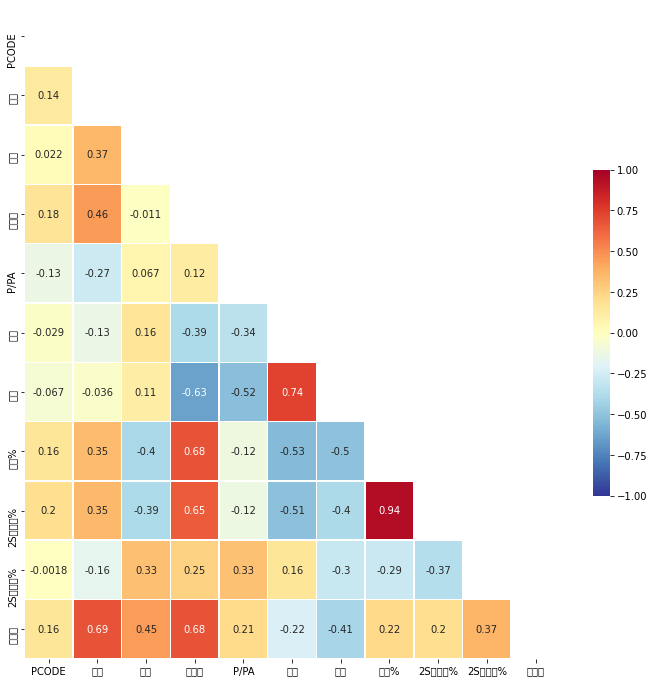

In [ ]:
df_corr = df1.corr()
fig, ax = plt.subplots( figsize=(12,12) )

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [ ]:
df1.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/출루율/1번/df1.csv')
df2.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/출루율/1번/df2.csv')
df3.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/출루율/1번/df3.csv')

#### 2) 연도별 가중치

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/빅콘테스트/01_제공데이터/출루율18.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/빅콘테스트/01_제공데이터/출루율19.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/빅콘테스트/01_제공데이터/출루율20.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/빅콘테스트/01_제공데이터/출루율21.xlsx')
df18 = df1.dropna()
df19 = df2.dropna()
df20 = df3.dropna()
df21 = df4.dropna()
df18 = df18[['이름','P/PA','전체','초구','컨택%','2S후커트%','2S후선구%']]
df19 = df19[['이름','P/PA','전체','초구','컨택%','2S후커트%','2S후선구%']]
df20 = df20[['이름','P/PA','전체','초구','컨택%','2S후커트%','2S후선구%']]
df21 = df21[['이름','P/PA','전체','초구','컨택%','2S후커트%','2S후선구%']]

In [ ]:
df18

,이름,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%
1,이병규,4.36,36.7,21.8,73.7,67.2,47.4
2,강경학,4.26,42.6,26.3,81.9,76.8,36.8
3,한유섬,4.21,42.9,21.2,74.5,72.6,36.5
4,박경수,4.20,42.6,28.4,74.1,67.7,40.7
5,정은원,4.19,41.2,19.8,76.8,72.1,38.5
...,...,...,...,...,...,...,...
97,김재현,3.54,43.2,33.8,73.7,57.8,36.9
98,박건우,3.49,47.6,33.7,83.6,79.3,31.4
99,김성현,3.48,45.9,32.9,88.5,84.8,35.6
100,안치홍,3.43,47.4,27.7,82.7,80.4,30.1


In [ ]:
df18_ = df18.drop(['이름'], axis = 1)
df19_ = df19.drop(['이름'], axis = 1)
df20_ = df20.drop(['이름'], axis = 1)
df21_ = df21.drop(['이름'], axis = 1)

In [ ]:
df18_ = df18_ * 4 * 0.175
df19_ = df19_ * 4 * 0.225 
df20_ = df20_ * 4 * 0.275 
df21_ = df21_ * 4 * 0.325 

In [ ]:
df18 = pd.concat([df18['이름'], df18_], axis = 1)
df19 = pd.concat([df19['이름'], df19_], axis = 1)
df20 = pd.concat([df20['이름'], df20_], axis = 1)
df21 = pd.concat([df21['이름'], df21_], axis = 1)
df21

,이름,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%
1,정은원,5.889,39.13,7.80,110.76,100.36,53.95
2,권희동,5.811,47.32,13.65,115.96,109.46,51.61
3,최주환,5.681,54.86,13.26,111.41,105.56,41.86
4,문보경,5.629,50.70,32.11,105.82,103.74,49.53
5,강백호,5.603,50.83,23.79,104.52,102.31,46.41
...,...,...,...,...,...,...,...
99,류지혁,4.628,57.59,46.28,108.03,102.18,52.13
100,강민호,4.602,56.94,29.12,106.21,102.83,50.05
101,황대인,4.550,66.95,45.76,98.28,84.11,38.09
102,페르난데스,4.511,59.15,38.35,116.09,113.88,47.71


In [ ]:
df_all = pd.concat([df18, df19, df20, df21])
df_all

,이름,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%
1,이병규,3.052,25.69,15.26,51.59,47.04,33.18
2,강경학,2.982,29.82,18.41,57.33,53.76,25.76
3,한유섬,2.947,30.03,14.84,52.15,50.82,25.55
4,박경수,2.940,29.82,19.88,51.87,47.39,28.49
5,정은원,2.933,28.84,13.86,53.76,50.47,26.95
...,...,...,...,...,...,...,...
99,류지혁,4.628,57.59,46.28,108.03,102.18,52.13
100,강민호,4.602,56.94,29.12,106.21,102.83,50.05
101,황대인,4.550,66.95,45.76,98.28,84.11,38.09
102,페르난데스,4.511,59.15,38.35,116.09,113.88,47.71


In [ ]:
df_all = df_all.groupby(df_all['이름']).mean()
df_all = df_all.reset_index()
df_all

,이름,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%
0,강경학,3.80650,34.2700,20.3150,69.2000,61.0350,33.3400
1,강로한,3.44700,45.0900,33.2100,57.6900,50.2200,27.4500
2,강민호,3.72750,44.9275,25.5975,78.3475,75.5250,36.9725
3,강백호,4.01950,43.8725,30.1375,79.0825,75.2475,37.3975
4,강승호,4.97900,68.3800,40.8200,96.5900,94.1200,38.0900
...,...,...,...,...,...,...,...
163,호잉,2.95100,38.1300,24.2850,62.5150,59.1100,27.8800
164,홍창기,5.12600,43.9300,22.6450,100.9950,95.1100,50.8250
165,황대인,4.55000,66.9500,45.7600,98.2800,84.1100,38.0900
166,황재균,3.94825,44.2675,25.0800,80.6750,76.3500,34.3675


In [ ]:
df_all = df_all.rename(columns={'이름' : 'NAME'})
df_all

,NAME,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%
0,강경학,3.80650,34.2700,20.3150,69.2000,61.0350,33.3400
1,강로한,3.44700,45.0900,33.2100,57.6900,50.2200,27.4500
2,강민호,3.72750,44.9275,25.5975,78.3475,75.5250,36.9725
3,강백호,4.01950,43.8725,30.1375,79.0825,75.2475,37.3975
4,강승호,4.97900,68.3800,40.8200,96.5900,94.1200,38.0900
...,...,...,...,...,...,...,...
163,호잉,2.95100,38.1300,24.2850,62.5150,59.1100,27.8800
164,홍창기,5.12600,43.9300,22.6450,100.9950,95.1100,50.8250
165,황대인,4.55000,66.9500,45.7600,98.2800,84.1100,38.0900
166,황재균,3.94825,44.2675,25.0800,80.6750,76.3500,34.3675


In [ ]:
d2018 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv', encoding = 'cp949')
d2019 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv', encoding = 'cp949')
d2020 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv', encoding = 'cp949')
d2021 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv', encoding = 'cp949')
d2018.rename(columns={'PA':'타석', 'AB':'타수', 'BA':'타율', 'HIT':'안타', 'HR':'홈런', 'TOTB':'루타', 'SLG':'장타율', 'SF':'희생플라이', 'BB':'볼넷', 'KK':'삼진', 'IB': '고의4구', 'HP':'사구', 'GD':'병살타'}, inplace=True)
d2019.rename(columns={'PA':'타석', 'AB':'타수', 'BA':'타율', 'HIT':'안타', 'HR':'홈런', 'TOTB':'루타', 'SLG':'장타율', 'SF':'희생플라이', 'BB':'볼넷', 'KK':'삼진', 'IB': '고의4구', 'HP':'사구', 'GD':'병살타'}, inplace=True)
d2020.rename(columns={'PA':'타석', 'AB':'타수', 'BA':'타율', 'HIT':'안타', 'HR':'홈런', 'TOTB':'루타', 'SLG':'장타율', 'SF':'희생플라이', 'BB':'볼넷', 'KK':'삼진', 'IB': '고의4구', 'HP':'사구', 'GD':'병살타'}, inplace=True)
d2021.rename(columns={'PA':'타석', 'AB':'타수', 'BA':'타율', 'HIT':'안타', 'HR':'홈런', 'TOTB':'루타', 'SLG':'장타율', 'SF':'희생플라이', 'BB':'볼넷', 'KK':'삼진', 'IB': '고의4구', 'HP':'사구', 'GD':'병살타'}, inplace=True)
d2018

,GYEAR,PCODE,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2018,79530,21,15,14,0.286,4,0,6,0.429,0,1,5,0,0,1
271,2018,79608,130,549,494,0.342,169,23,278,0.563,9,36,57,1,10,13
272,2018,79705,58,102,85,0.259,22,4,39,0.459,0,11,26,0,3,3
273,2018,99606,88,205,183,0.295,54,4,77,0.421,1,16,49,1,5,5


In [ ]:
d2018 = d2018[d2018['타석'] >= 223]
d2019 = d2019[d2019['타석'] >= 223]
d2020 = d2020[d2020['타석'] >= 223]
d2021 = d2021[d2021['타석'] >= 116]
d2018

,GYEAR,PCODE,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타
6,2018,60558,128,374,342,0.254,87,12,144,0.421,1,24,92,0,4,7
11,2018,61102,132,465,425,0.296,126,19,216,0.508,1,28,80,1,9,21
14,2018,61186,112,405,359,0.340,122,2,156,0.435,2,39,48,2,3,11
17,2018,61208,111,299,269,0.301,81,2,101,0.375,1,19,44,0,1,8
18,2018,61353,102,351,330,0.279,92,6,132,0.400,4,15,96,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2018,79215,125,529,488,0.326,159,12,231,0.473,2,28,65,1,10,14
259,2018,79240,133,577,516,0.324,167,10,237,0.459,8,32,52,0,16,15
266,2018,79402,122,499,453,0.263,119,10,164,0.362,3,27,91,0,8,11
271,2018,79608,130,549,494,0.342,169,23,278,0.563,9,36,57,1,10,13


In [ ]:
d2018_ = d2018.drop(['GYEAR', 'PCODE'], axis = 1)
d2019_ = d2019.drop(['GYEAR', 'PCODE'], axis = 1)
d2020_ = d2020.drop(['GYEAR', 'PCODE'], axis = 1)
d2021_ = d2021.drop(['GYEAR', 'PCODE'], axis = 1)

In [ ]:
d2018_ = d2018_ * 4 * 0.175
d2019_ = d2019_ * 4 * 0.225 
d2020_ = d2020_ * 4 * 0.275 
d2021_ = d2021_ * 4 * 0.325 

In [ ]:
df2018 = pd.concat([d2018[['GYEAR', 'PCODE']], d2018_], axis = 1)
df2019 = pd.concat([d2019[['GYEAR', 'PCODE']], d2019_], axis = 1)
df2020 = pd.concat([d2020[['GYEAR', 'PCODE']], d2020_], axis = 1)
df2021 = pd.concat([d2021[['GYEAR', 'PCODE']], d2021_], axis = 1)
df2020

,GYEAR,PCODE,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타
3,2020,50165,128.7,543.4,474.1,0.3058,132.0,41.8,280.5,0.6512,4.4,60.5,149.6,5.5,4.4,7.7
10,2020,50350,71.5,298.1,268.4,0.2794,68.2,2.2,90.2,0.3696,3.3,24.2,40.7,1.1,2.2,6.6
13,2020,50458,148.5,315.7,279.4,0.2552,64.9,1.1,75.9,0.2992,2.2,26.4,48.4,0.0,2.2,1.1
16,2020,50506,158.4,616.0,534.6,0.3080,149.6,13.2,225.5,0.4642,8.8,59.4,66.0,2.2,8.8,22.0
22,2020,50730,81.4,350.9,311.3,0.2915,82.5,9.9,133.1,0.4708,2.2,29.7,89.1,1.1,7.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2020,79240,128.7,535.7,480.7,0.3652,159.5,7.7,212.3,0.4862,7.7,38.5,30.8,2.2,5.5,11.0
281,2020,79365,123.2,409.2,356.4,0.2750,89.1,13.2,151.8,0.4686,2.2,41.8,74.8,0.0,6.6,11.0
282,2020,79402,132.0,518.1,444.4,0.3344,135.3,5.5,178.2,0.4411,2.2,60.5,60.5,1.1,8.8,17.6
283,2020,79456,111.1,317.9,288.2,0.3399,89.1,0.0,104.5,0.3993,1.1,20.9,30.8,1.1,4.4,8.8


In [ ]:
df_all2 = pd.concat([df2018, df2019, df2020, df2021])
df_all2

,GYEAR,PCODE,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타
6,2018,60558,89.6,261.8,239.4,0.1778,60.9,8.4,100.8,0.2947,0.7,16.8,64.4,0.0,2.8,4.9
11,2018,61102,92.4,325.5,297.5,0.2072,88.2,13.3,151.2,0.3556,0.7,19.6,56.0,0.7,6.3,14.7
14,2018,61186,78.4,283.5,251.3,0.2380,85.4,1.4,109.2,0.3045,1.4,27.3,33.6,1.4,2.1,7.7
17,2018,61208,77.7,209.3,188.3,0.2107,56.7,1.4,70.7,0.2625,0.7,13.3,30.8,0.0,0.7,5.6
18,2018,61353,71.4,245.7,231.0,0.1953,64.4,4.2,92.4,0.2800,2.8,10.5,67.2,0.7,0.7,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2021,79240,89.7,391.3,362.7,0.4199,117.0,5.2,158.6,0.5681,1.3,23.4,24.7,1.3,3.9,15.6
242,2021,79365,94.9,339.3,284.7,0.3445,75.4,20.8,152.1,0.6942,1.3,41.6,89.7,0.0,7.8,6.5
243,2021,79402,91.0,361.4,308.1,0.2743,65.0,1.3,79.3,0.3341,0.0,39.0,33.8,0.0,3.9,9.1
244,2021,79456,80.6,175.5,161.2,0.3562,44.2,0.0,49.4,0.3978,2.6,9.1,14.3,1.3,1.3,6.5


In [ ]:
df_all2 = df_all2.groupby('PCODE').mean()
df_all2 = df_all2.reset_index()
df_all2

,PCODE,GYEAR,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타
0,50165,2020.5,97.500,404.950000,357.30,0.310850,95.250000,26.100000,190.950,0.599900,2.200000,41.950,102.750000,2.750,3.50,5.150000
1,50350,2020.0,71.500,298.100000,268.40,0.279400,68.200000,2.200000,90.200,0.369600,3.300000,24.200,40.700000,1.100,2.20,6.600000
2,50458,2020.5,118.450,285.250000,251.50,0.301150,62.350000,1.200000,73.050,0.353700,3.050000,21.650,37.850000,0.000,1.10,0.550000
3,50506,2020.5,123.400,486.100000,417.45,0.334050,116.400000,9.200000,171.250,0.485600,7.650000,53.750,55.100000,1.750,5.05,14.250000
4,50709,2021.0,42.900,156.000000,139.10,0.254800,27.300000,0.000000,32.500,0.304200,1.300000,11.700,41.600000,0.000,0.00,1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,79365,2020.0,106.300,357.800000,308.80,0.295600,83.033333,14.333333,143.600,0.521100,1.466667,38.000,71.633333,0.000,5.40,8.833333
167,79402,2019.5,106.125,429.375000,372.70,0.259175,99.475000,4.575000,130.425,0.337025,1.975000,40.850,54.575000,0.500,7.95,11.750000
168,79456,2020.0,95.700,263.766667,242.20,0.316633,70.533333,0.300000,80.400,0.360200,1.533333,14.500,23.433333,1.100,2.20,9.300000
169,79608,2019.5,98.350,394.325000,350.10,0.315000,110.100000,8.975000,162.075,0.461125,4.875000,33.375,41.625000,1.275,3.90,8.950000


In [ ]:
df_all

,NAME,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%
0,강경학,3.80650,34.2700,20.3150,69.2000,61.0350,33.3400
1,강로한,3.44700,45.0900,33.2100,57.6900,50.2200,27.4500
2,강민호,3.72750,44.9275,25.5975,78.3475,75.5250,36.9725
3,강백호,4.01950,43.8725,30.1375,79.0825,75.2475,37.3975
4,강승호,4.97900,68.3800,40.8200,96.5900,94.1200,38.0900
...,...,...,...,...,...,...,...
163,호잉,2.95100,38.1300,24.2850,62.5150,59.1100,27.8800
164,홍창기,5.12600,43.9300,22.6450,100.9950,95.1100,50.8250
165,황대인,4.55000,66.9500,45.7600,98.2800,84.1100,38.0900
166,황재균,3.94825,44.2675,25.0800,80.6750,76.3500,34.3675


In [ ]:
df_test3 = pd.merge(pf, df_all2, how = 'inner', on='PCODE')
df_test3

,PCODE,NAME,GYEAR,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타
0,60523,정훈,2020.5,107.2,467.200,406.850,0.37870,127.000,11.900,184.650,0.551400,2.850,52.90,76.000,1.300,2.850,6.350
1,60558,오태곤,2019.5,97.7,265.875,242.075,0.25795,62.375,6.125,93.625,0.387825,0.625,17.35,56.975,0.000,3.525,5.650
2,60566,이상호,2019.0,91.8,230.400,210.600,0.25020,58.500,0.000,64.800,0.277200,2.700,8.10,19.800,0.000,1.800,9.000
3,61102,유강남,2019.5,112.9,398.400,358.225,0.26655,96.475,12.950,154.250,0.420850,2.725,25.65,67.250,0.900,10.350,15.625
4,61186,이천웅,2019.5,94.3,370.900,325.750,0.26940,92.850,2.275,117.725,0.347075,2.550,36.75,46.100,0.575,3.725,10.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,51324,프레이타스,2021.0,55.9,192.400,180.700,0.33670,46.800,2.600,67.600,0.486200,1.300,9.10,37.700,0.000,1.300,9.100
168,51463,피렐라,2021.0,104.0,469.300,421.200,0.40560,131.300,26.000,230.100,0.709800,2.600,39.00,58.500,1.300,6.500,3.900
169,51725,힐리,2021.0,87.1,348.400,323.700,0.33410,83.200,9.100,127.400,0.512200,1.300,20.80,75.400,0.000,2.600,7.800
170,51817,추신수,2021.0,97.5,414.700,326.300,0.33150,83.200,16.900,148.200,0.590200,3.900,72.80,89.700,1.300,11.700,7.800


In [ ]:
df = pd.merge(df_all, df_test3, how = 'inner', on='NAME')
df

,NAME,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%,PCODE,GYEAR,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타
0,강경학,3.80650,34.2700,20.3150,69.2000,61.0350,33.3400,61700,2019.0,78.65,232.050,191.900,0.222700,48.000,3.950,69.35,0.322550,1.450,32.55,55.850,0.000,3.050,3.55
1,강로한,3.44700,45.0900,33.2100,57.6900,50.2200,27.4500,65515,2019.0,93.60,275.400,259.200,0.216000,62.100,3.600,97.20,0.337500,0.900,11.70,96.300,0.000,2.700,2.70
2,강민호,3.72750,44.9275,25.5975,78.3475,75.5250,36.9725,74540,2019.5,103.25,367.725,328.525,0.283950,91.750,15.575,152.85,0.469475,4.025,28.50,58.825,2.850,6.225,10.90
3,강백호,4.01950,43.8725,30.1375,79.0825,75.2475,37.3975,68050,2019.5,110.10,480.775,416.350,0.345475,140.000,17.575,222.95,0.540850,3.225,58.85,81.475,5.650,2.350,6.40
4,강승호,4.97900,68.3800,40.8200,96.5900,94.1200,38.0900,63123,2021.0,61.10,217.100,195.000,0.295100,44.200,2.600,61.10,0.406900,0.000,14.30,46.800,1.300,2.600,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,호잉,2.95100,38.1300,24.2850,62.5150,59.1100,27.8800,68730,2018.5,105.50,442.750,399.350,0.234900,117.450,18.600,204.60,0.407550,4.000,34.95,73.050,5.750,4.000,4.45
163,홍창기,5.12600,43.9300,22.6450,100.9950,95.1100,50.8250,66108,2020.5,123.00,500.500,399.250,0.373150,121.850,4.700,170.20,0.514700,2.300,85.30,76.450,1.850,12.000,7.00
164,황대인,4.55000,66.9500,45.7600,98.2800,84.1100,38.0900,65610,2021.0,44.20,163.800,152.100,0.310700,36.400,5.200,57.20,0.488800,3.900,6.50,33.800,0.000,0.000,2.60
165,황재균,3.94825,44.2675,25.0800,80.6750,76.3500,34.3675,76313,2019.5,105.20,449.250,402.125,0.303650,121.375,16.925,200.30,0.491650,2.750,40.35,75.300,0.625,2.850,8.05


In [ ]:
hitter = df
hitter['출루율'] = (hitter['안타'] + hitter['사구'] + hitter['고의4구'] + hitter['볼넷']) / (hitter['타수'] + hitter['사구'] + hitter['고의4구'] + hitter['볼넷'] + hitter['희생플라이'])
df = hitter
df['볼삼비'] = df['볼넷'] / df['삼진']
df

,NAME,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%,PCODE,GYEAR,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,볼삼비
0,강경학,3.80650,34.2700,20.3150,69.2000,61.0350,33.3400,61700,2019.0,78.65,232.050,191.900,0.222700,48.000,3.950,69.35,0.322550,1.450,32.55,55.850,0.000,3.050,3.55,0.365145,0.582811
1,강로한,3.44700,45.0900,33.2100,57.6900,50.2200,27.4500,65515,2019.0,93.60,275.400,259.200,0.216000,62.100,3.600,97.20,0.337500,0.900,11.70,96.300,0.000,2.700,2.70,0.278689,0.121495
2,강민호,3.72750,44.9275,25.5975,78.3475,75.5250,36.9725,74540,2019.5,103.25,367.725,328.525,0.283950,91.750,15.575,152.85,0.469475,4.025,28.50,58.825,2.850,6.225,10.90,0.349409,0.484488
3,강백호,4.01950,43.8725,30.1375,79.0825,75.2475,37.3975,68050,2019.5,110.10,480.775,416.350,0.345475,140.000,17.575,222.95,0.540850,3.225,58.85,81.475,5.650,2.350,6.40,0.425245,0.722307
4,강승호,4.97900,68.3800,40.8200,96.5900,94.1200,38.0900,63123,2021.0,61.10,217.100,195.000,0.295100,44.200,2.600,61.10,0.406900,0.000,14.30,46.800,1.300,2.600,3.90,0.292683,0.305556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,호잉,2.95100,38.1300,24.2850,62.5150,59.1100,27.8800,68730,2018.5,105.50,442.750,399.350,0.234900,117.450,18.600,204.60,0.407550,4.000,34.95,73.050,5.750,4.000,4.45,0.361902,0.478439
163,홍창기,5.12600,43.9300,22.6450,100.9950,95.1100,50.8250,66108,2020.5,123.00,500.500,399.250,0.373150,121.850,4.700,170.20,0.514700,2.300,85.30,76.450,1.850,12.000,7.00,0.441382,1.115762
164,황대인,4.55000,66.9500,45.7600,98.2800,84.1100,38.0900,65610,2021.0,44.20,163.800,152.100,0.310700,36.400,5.200,57.20,0.488800,3.900,6.50,33.800,0.000,0.000,2.60,0.264000,0.192308
165,황재균,3.94825,44.2675,25.0800,80.6750,76.3500,34.3675,76313,2019.5,105.20,449.250,402.125,0.303650,121.375,16.925,200.30,0.491650,2.750,40.35,75.300,0.625,2.850,8.05,0.368175,0.535857


In [ ]:
df1 = df[['PCODE', '타율', '홈런', '볼삼비', 'P/PA', '초구', '전체', '컨택%', '2S후커트%', '2S후선구%', '출루율']]
df2 = df[['PCODE', '타율', '홈런', '볼삼비', 'P/PA', '전체', '컨택%', '2S후선구%', '출루율']]
df3 = df[['PCODE', '타율', '홈런', '볼삼비', '전체', '2S후선구%', '출루율']]

In [ ]:
df1.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/출루율/2번/df1.csv')
df2.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/출루율/2번/df2.csv')
df3.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/출루율/2번/df3.csv')

#### 3) 연도별 값 따로

In [ ]:
d2018 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv', encoding = 'cp949')
d2019 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv', encoding = 'cp949')
d2020 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv', encoding = 'cp949')
d2021 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv', encoding = 'cp949')
d2018.rename(columns={'PA':'타석', 'AB':'타수', 'BA':'타율', 'HIT':'안타', 'HR':'홈런', 'TOTB':'루타', 'SLG':'장타율', 'SF':'희생플라이', 'BB':'볼넷', 'KK':'삼진', 'IB': '고의4구', 'HP':'사구', 'GD':'병살타'}, inplace=True)
d2019.rename(columns={'PA':'타석', 'AB':'타수', 'BA':'타율', 'HIT':'안타', 'HR':'홈런', 'TOTB':'루타', 'SLG':'장타율', 'SF':'희생플라이', 'BB':'볼넷', 'KK':'삼진', 'IB': '고의4구', 'HP':'사구', 'GD':'병살타'}, inplace=True)
d2020.rename(columns={'PA':'타석', 'AB':'타수', 'BA':'타율', 'HIT':'안타', 'HR':'홈런', 'TOTB':'루타', 'SLG':'장타율', 'SF':'희생플라이', 'BB':'볼넷', 'KK':'삼진', 'IB': '고의4구', 'HP':'사구', 'GD':'병살타'}, inplace=True)
d2021.rename(columns={'PA':'타석', 'AB':'타수', 'BA':'타율', 'HIT':'안타', 'HR':'홈런', 'TOTB':'루타', 'SLG':'장타율', 'SF':'희생플라이', 'BB':'볼넷', 'KK':'삼진', 'IB': '고의4구', 'HP':'사구', 'GD':'병살타'}, inplace=True)
d2018 = d2018[d2018['타석'] >= 223]
d2019 = d2019[d2019['타석'] >= 223]
d2020 = d2020[d2020['타석'] >= 223]
d2021 = d2021[d2021['타석'] >= 116]
df = pd.concat([d2018, d2019, d2020, d2021], ignore_index=True)
df.rename(columns={'HIT_VEL' : '타구속도', 'HIT_ANG_VER': "발사각도", 'PIT_VEL': '투구구속'}, inplace=True)
df['PCODE_YEAR'] = ' '
for i in range(len(df)):
  df['PCODE_YEAR'][i] = str(df['PCODE'][i]) + '_' + str(df['GYEAR'][i])
df

,GYEAR,PCODE,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,PCODE_YEAR
0,2018,60558,128,374,342,0.254,87,12,144,0.421,1,24,92,0,4,7,60558_2018
1,2018,61102,132,465,425,0.296,126,19,216,0.508,1,28,80,1,9,21,61102_2018
2,2018,61186,112,405,359,0.340,122,2,156,0.435,2,39,48,2,3,11,61186_2018
3,2018,61208,111,299,269,0.301,81,2,101,0.375,1,19,44,0,1,8,61208_2018
4,2018,61353,102,351,330,0.279,92,6,132,0.400,4,15,96,1,1,2,61353_2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,2021,79240,69,301,279,0.323,90,4,122,0.437,1,18,19,1,3,12,79240_2021
407,2021,79365,73,261,219,0.265,58,16,117,0.534,1,32,69,0,6,5,79365_2021
408,2021,79402,70,278,237,0.211,50,1,61,0.257,0,30,26,0,3,7,79402_2021
409,2021,79456,62,135,124,0.274,34,0,38,0.306,2,7,11,1,1,5,79456_2021


In [ ]:
df = pd.merge(pf, df, how = 'outer', on='PCODE').dropna()
df

,PCODE,NAME,GYEAR,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,PCODE_YEAR
16,60523,정훈,2020.0,111.0,476.0,410.0,0.295,121.0,11.0,175.0,0.427,4.0,56.0,85.0,0.0,4.0,8.0,60523_2020
17,60523,정훈,2021.0,71.0,316.0,279.0,0.333,93.0,9.0,136.0,0.487,1.0,34.0,45.0,2.0,1.0,3.0,60523_2021
18,60558,오태곤,2018.0,128.0,374.0,342.0,0.254,87.0,12.0,144.0,0.421,1.0,24.0,92.0,0.0,4.0,7.0,60558_2018
19,60558,오태곤,2019.0,123.0,392.0,352.0,0.250,88.0,6.0,124.0,0.352,2.0,31.0,78.0,0.0,4.0,8.0,60558_2019
20,60558,오태곤,2020.0,94.0,258.0,234.0,0.274,64.0,5.0,93.0,0.397,0.0,13.0,47.0,0.0,7.0,6.0,60558_2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,51324,프레이타스,2021.0,43.0,148.0,139.0,0.259,36.0,2.0,52.0,0.374,1.0,7.0,29.0,0.0,1.0,7.0,51324_2021
1268,51463,피렐라,2021.0,80.0,361.0,324.0,0.312,101.0,20.0,177.0,0.546,2.0,30.0,45.0,1.0,5.0,3.0,51463_2021
1289,51725,힐리,2021.0,67.0,268.0,249.0,0.257,64.0,7.0,98.0,0.394,1.0,16.0,58.0,0.0,2.0,6.0,51725_2021
1296,51817,추신수,2021.0,75.0,319.0,251.0,0.255,64.0,13.0,114.0,0.454,3.0,56.0,69.0,1.0,9.0,6.0,51817_2021


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/빅콘테스트/01_제공데이터/출루율18.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/빅콘테스트/01_제공데이터/출루율19.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/빅콘테스트/01_제공데이터/출루율20.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/빅콘테스트/01_제공데이터/출루율21.xlsx')
df18 = df1.dropna()
df19 = df2.dropna()
df20 = df3.dropna()
df21 = df4.dropna()
df18 = df18[['이름','P/PA','전체','초구','컨택%','2S후커트%','2S후선구%']]
df19 = df19[['이름','P/PA','전체','초구','컨택%','2S후커트%','2S후선구%']]
df20 = df20[['이름','P/PA','전체','초구','컨택%','2S후커트%','2S후선구%']]
df21 = df21[['이름','P/PA','전체','초구','컨택%','2S후커트%','2S후선구%']]
df18['GYEAR'] = 2018
df19['GYEAR'] = 2019
df20['GYEAR'] = 2020
df21['GYEAR'] = 2021

In [ ]:
pf = pf.rename(columns={'NAME' :'이름'})

In [ ]:
df18 = pd.merge(pf, df18, on='이름')
df19 = pd.merge(pf, df19, on='이름')
df20 = pd.merge(pf, df20, on='이름')
df21 = pd.merge(pf, df21, on='이름')

In [ ]:
df18['PCODE_YEAR'] = ' '
for i in range(len(df18)):
  df18['PCODE_YEAR'][i] = str(df18['PCODE'][i]) + '_' + str(df18['GYEAR'][i])

df19['PCODE_YEAR'] = ' '
for i in range(len(df19)):
  df19['PCODE_YEAR'][i] = str(df19['PCODE'][i]) + '_' + str(df19['GYEAR'][i])

df20['PCODE_YEAR'] = ' '
for i in range(len(df20)):
  df20['PCODE_YEAR'][i] = str(df20['PCODE'][i]) + '_' + str(df20['GYEAR'][i])

df21['PCODE_YEAR'] = ' '
for i in range(len(df21)):
  df21['PCODE_YEAR'][i] = str(df21['PCODE'][i]) + '_' + str(df21['GYEAR'][i])

In [ ]:
df_all = pd.concat([df18, df19, df20, df21])
df_all

,PCODE,이름,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%,GYEAR,PCODE_YEAR
0,60558,오태곤,3.75,48.2,30.0,71.5,66.6,33.4,2018,60558_2018
1,61102,유강남,3.76,50.1,28.0,78.3,76.8,31.6,2018,61102_2018
2,61186,이천웅,3.63,46.9,35.3,82.4,80.2,36.7,2018,61186_2018
3,61208,정진호,3.75,48.4,29.8,84.7,79.8,29.9,2018,61208_2018
4,61353,고종욱,3.81,51.0,39.9,72.6,63.8,34.8,2018,61353_2018
...,...,...,...,...,...,...,...,...,...,...
109,51203,안재석,3.87,50.2,33.7,77.0,71.0,30.8,2021,51203_2021
110,51463,피렐라,3.79,44.3,18.5,79.1,77.5,37.8,2021,51463_2021
111,51725,힐리,3.88,46.7,23.5,75.7,72.6,27.5,2021,51725_2021
112,51817,추신수,4.18,39.2,23.2,74.0,62.9,43.6,2021,51817_2021


In [ ]:
df = pd.merge(df_all, df, on='PCODE_YEAR')
df

,PCODE_x,이름,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%,GYEAR_x,PCODE_YEAR,PCODE_y,NAME,GYEAR_y,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타
0,60558,오태곤,3.75,48.2,30.0,71.5,66.6,33.4,2018,60558_2018,60558,오태곤,2018.0,128.0,374.0,342.0,0.254,87.0,12.0,144.0,0.421,1.0,24.0,92.0,0.0,4.0,7.0
1,61102,유강남,3.76,50.1,28.0,78.3,76.8,31.6,2018,61102_2018,61102,유강남,2018.0,132.0,465.0,425.0,0.296,126.0,19.0,216.0,0.508,1.0,28.0,80.0,1.0,9.0,21.0
2,61186,이천웅,3.63,46.9,35.3,82.4,80.2,36.7,2018,61186_2018,61186,이천웅,2018.0,112.0,405.0,359.0,0.340,122.0,2.0,156.0,0.435,2.0,39.0,48.0,2.0,3.0,11.0
3,61208,정진호,3.75,48.4,29.8,84.7,79.8,29.9,2018,61208_2018,61208,정진호,2018.0,111.0,299.0,269.0,0.301,81.0,2.0,101.0,0.375,1.0,19.0,44.0,0.0,1.0,8.0
4,61353,고종욱,3.81,51.0,39.9,72.6,63.8,34.8,2018,61353_2018,61353,고종욱,2018.0,102.0,351.0,330.0,0.279,92.0,6.0,132.0,0.400,4.0,15.0,96.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,51203,안재석,3.87,50.2,33.7,77.0,71.0,30.8,2021,51203_2021,51203,안재석,2021.0,52.0,144.0,131.0,0.275,36.0,2.0,52.0,0.397,3.0,7.0,35.0,0.0,3.0,3.0
396,51463,피렐라,3.79,44.3,18.5,79.1,77.5,37.8,2021,51463_2021,51463,피렐라,2021.0,80.0,361.0,324.0,0.312,101.0,20.0,177.0,0.546,2.0,30.0,45.0,1.0,5.0,3.0
397,51725,힐리,3.88,46.7,23.5,75.7,72.6,27.5,2021,51725_2021,51725,힐리,2021.0,67.0,268.0,249.0,0.257,64.0,7.0,98.0,0.394,1.0,16.0,58.0,0.0,2.0,6.0
398,51817,추신수,4.18,39.2,23.2,74.0,62.9,43.6,2021,51817_2021,51817,추신수,2021.0,75.0,319.0,251.0,0.255,64.0,13.0,114.0,0.454,3.0,56.0,69.0,1.0,9.0,6.0


In [ ]:
hitter = df
hitter['출루율'] = (hitter['안타'] + hitter['사구'] + hitter['고의4구'] + hitter['볼넷']) / (hitter['타수'] + hitter['사구'] + hitter['고의4구'] + hitter['볼넷'] + hitter['희생플라이'])
df = hitter
df['볼삼비'] = df['볼넷'] / df['삼진']
df

,PCODE_x,이름,P/PA,전체,초구,컨택%,2S후커트%,2S후선구%,GYEAR_x,PCODE_YEAR,PCODE_y,NAME,GYEAR_y,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,볼삼비
0,60558,오태곤,3.75,48.2,30.0,71.5,66.6,33.4,2018,60558_2018,60558,오태곤,2018.0,128.0,374.0,342.0,0.254,87.0,12.0,144.0,0.421,1.0,24.0,92.0,0.0,4.0,7.0,0.309973,0.260870
1,61102,유강남,3.76,50.1,28.0,78.3,76.8,31.6,2018,61102_2018,61102,유강남,2018.0,132.0,465.0,425.0,0.296,126.0,19.0,216.0,0.508,1.0,28.0,80.0,1.0,9.0,21.0,0.353448,0.350000
2,61186,이천웅,3.63,46.9,35.3,82.4,80.2,36.7,2018,61186_2018,61186,이천웅,2018.0,112.0,405.0,359.0,0.340,122.0,2.0,156.0,0.435,2.0,39.0,48.0,2.0,3.0,11.0,0.409877,0.812500
3,61208,정진호,3.75,48.4,29.8,84.7,79.8,29.9,2018,61208_2018,61208,정진호,2018.0,111.0,299.0,269.0,0.301,81.0,2.0,101.0,0.375,1.0,19.0,44.0,0.0,1.0,8.0,0.348276,0.431818
4,61353,고종욱,3.81,51.0,39.9,72.6,63.8,34.8,2018,61353_2018,61353,고종욱,2018.0,102.0,351.0,330.0,0.279,92.0,6.0,132.0,0.400,4.0,15.0,96.0,1.0,1.0,2.0,0.310541,0.156250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,51203,안재석,3.87,50.2,33.7,77.0,71.0,30.8,2021,51203_2021,51203,안재석,2021.0,52.0,144.0,131.0,0.275,36.0,2.0,52.0,0.397,3.0,7.0,35.0,0.0,3.0,3.0,0.319444,0.200000
396,51463,피렐라,3.79,44.3,18.5,79.1,77.5,37.8,2021,51463_2021,51463,피렐라,2021.0,80.0,361.0,324.0,0.312,101.0,20.0,177.0,0.546,2.0,30.0,45.0,1.0,5.0,3.0,0.378453,0.666667
397,51725,힐리,3.88,46.7,23.5,75.7,72.6,27.5,2021,51725_2021,51725,힐리,2021.0,67.0,268.0,249.0,0.257,64.0,7.0,98.0,0.394,1.0,16.0,58.0,0.0,2.0,6.0,0.305970,0.275862
398,51817,추신수,4.18,39.2,23.2,74.0,62.9,43.6,2021,51817_2021,51817,추신수,2021.0,75.0,319.0,251.0,0.255,64.0,13.0,114.0,0.454,3.0,56.0,69.0,1.0,9.0,6.0,0.406250,0.811594


In [ ]:
df1 = df[['PCODE_YEAR', '타율', '홈런', '볼삼비', 'P/PA', '초구', '전체', '컨택%', '2S후커트%', '2S후선구%', '출루율']]
df2 = df[['PCODE_YEAR', '타율', '홈런', '볼삼비', 'P/PA', '전체', '컨택%', '2S후선구%', '출루율']]
df3 = df[['PCODE_YEAR', '타율', '홈런', '볼삼비', '전체', '2S후선구%', '출루율']]

In [ ]:
df1.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/출루율/3번/df1.csv')
df2.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/출루율/3번/df2.csv')
df3.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/출루율/3번/df3.csv')